# Problem Statement

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. The data also includes certain attributes of each product and store.

# Objective

The objective for this study is to build a predictive model and find out the sales of each product at a particular store. Big Mart will use this model to understand the properties of products and stores which play a key role in increasing sales.

# Hypothesis

This is a crucial step in the ML process. It involves understanding the problem and making some hypothesis about what factors could potentially affect the outcome of the problem statement. This step should be done BEFORE looking at the data.

# Load Packages and Data

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [84]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [85]:
train['source'] = 'Train'
test['source'] = 'Test'
data = pd.concat([train, test], ignore_index = True, sort = True)
print (train.shape, test.shape, data.shape)

(8523, 13) (5681, 12) (14204, 13)


We have train(8523) and test(5681) data set, train data set has both input and output variable(s). We need to predict the sales for test data set.

# Data Structure and content

In [86]:
data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,Train
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,Train
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,Train
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,NaN,Grocery Store,Train
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,Train


In [87]:
data.shape

(14204, 13)

# Numerical data summary

In [88]:
data.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,11765.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.792854,1997.830681
std,62.086938,1706.499616,0.051459,4.652502,8.371664
min,31.290000,33.290000,0.000000,4.555000,1985.000000
25%,94.012000,834.247400,0.027036,8.710000,1987.000000
50%,142.247000,1794.331000,0.054021,12.600000,1999.000000
75%,185.855600,3101.296400,0.094037,16.750000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Fat_Content           14204 non-null  object 
 1   Item_Identifier            14204 non-null  object 
 2   Item_MRP                   14204 non-null  float64
 3   Item_Outlet_Sales          8523 non-null   float64
 4   Item_Type                  14204 non-null  object 
 5   Item_Visibility            14204 non-null  float64
 6   Item_Weight                11765 non-null  float64
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Identifier          14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Size                10188 non-null  object 
 11  Outlet_Type                14204 non-null  object 
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

In [90]:
data.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
source                          0
dtype: int64

In [91]:
data.nunique()

Item_Fat_Content                 5
Item_Identifier               1559
Item_MRP                      8052
Item_Outlet_Sales             3493
Item_Type                       16
Item_Visibility              13006
Item_Weight                    415
Outlet_Establishment_Year        9
Outlet_Identifier               10
Outlet_Location_Type             3
Outlet_Size                      3
Outlet_Type                      4
source                           2
dtype: int64

# Exploratory Data Analysis

In [92]:
#Filter categorical variables
categorical_columns = [x for x in data.dtypes.index if data.dtypes[x]=='object']
categorical_columns # all are not required 
categorical_columns = [x for x in categorical_columns if x not in ["Item_Identifier","Outlet_Identifier","source"]]
categorical_columns

for col in categorical_columns:
    print ("frequency of categorical variables")
    print(col)
    print(data[col].value_counts())

frequency of categorical variables
Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64
frequency of categorical variables
Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64
frequency of categorical variables
Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64
frequency of categorical variables
Outlet_Size
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64
frequency 

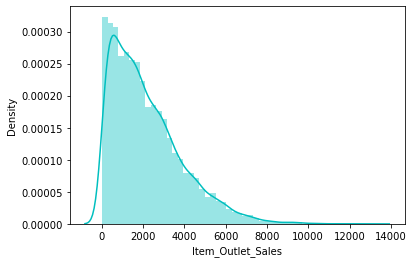

In [93]:
import seaborn as sns
sns.distplot(data.Item_Outlet_Sales, color = "c")
plt.show()

Here, we can see that Item_Outlet_sales is positively skewed

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

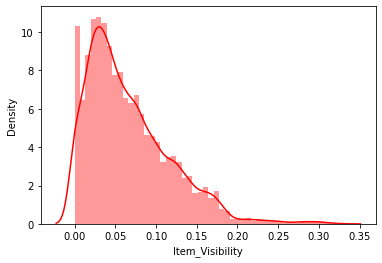

In [94]:
sns.distplot(data.Item_Visibility, color = "red")

Here, Visibility is Higher for lot of Items

In [95]:
s_profit = pd.DataFrame({'Item_Type': data.Item_Type, 'Profit': data.Item_Outlet_Sales})
s_profit.head()

,Item_Type,Profit
0,Dairy,3735.1380
1,Soft Drinks,443.4228
2,Meat,2097.2700
3,Fruits and Vegetables,732.3800
4,Household,994.7052


In [96]:
# summing profit of each state
s_data = s_profit.groupby(['Item_Type'], as_index = False).sum()
s_data

,Item_Type,Profit
0,Baking Goods,1.265525e+06
1,Breads,5.532372e+05
2,Breakfast,2.322990e+05
3,Canned,1.444151e+06
4,Dairy,1.522594e+06
5,Frozen Foods,1.825735e+06
6,Fruits and Vegetables,2.820060e+06
7,Hard Drinks,4.577934e+05
8,Health and Hygiene,1.045200e+06
9,Household,2.055494e+06


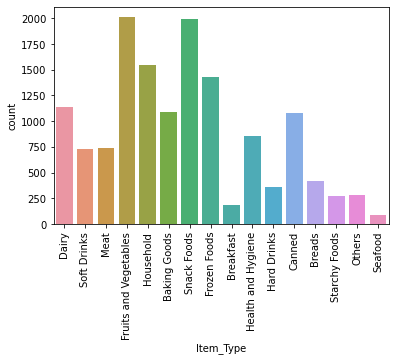

In [97]:
sns.countplot(x = "Item_Type", data = data)
plt.xticks(rotation = 90)
plt.show()

<AxesSubplot:>

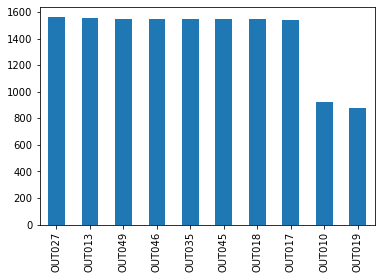

In [98]:
# Outlet _Identifier
data.Outlet_Identifier.value_counts().plot(kind = "bar")

# Univariate Analysis

# For continuous variables

<AxesSubplot:ylabel='Frequency'>

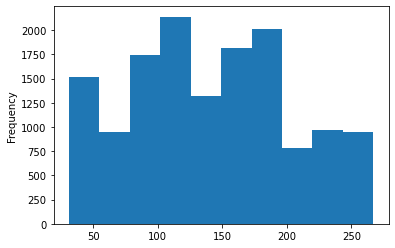

In [99]:
# plotting a histogram for Item_MRP variable
data['Item_MRP'].plot.hist()

<AxesSubplot:>

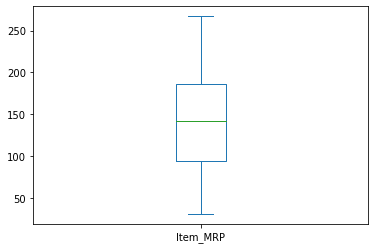

In [100]:
# plotting a boxplot for Item_MRP variable
data['Item_MRP'].plot.box()

Here, we can see that there is no outlier in Item_MRP variable

# Bivariate Analysis

# For continuous - continuous variable

In [101]:
data['Item_Weight'].corr(data['Item_MRP'])

0.03623610341060099

# Correlation

In [102]:
# Correlation between Item_Weight and Item_MRP

data[['Item_Weight','Item_MRP']].corr()

,Item_Weight,Item_MRP
Item_Weight,1.000000,0.036236
Item_MRP,0.036236,1.000000


In [103]:
# seaborn: Statistical data visulization. Seaborn ia a python data visulization library based on matplotlib.
# it provides a high-level interface for drawing attrative and informative statistical graphics. 

import seaborn as sns

In [104]:
data.corr()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
Item_MRP,1.000000,0.567574,-0.006351,0.036236,0.000141
Item_Outlet_Sales,0.567574,1.000000,-0.128625,0.014123,-0.049135
Item_Visibility,-0.006351,-0.128625,1.000000,-0.015901,-0.083678
Item_Weight,0.036236,0.014123,-0.015901,1.000000,0.000645
Outlet_Establishment_Year,0.000141,-0.049135,-0.083678,0.000645,1.000000


<AxesSubplot:>

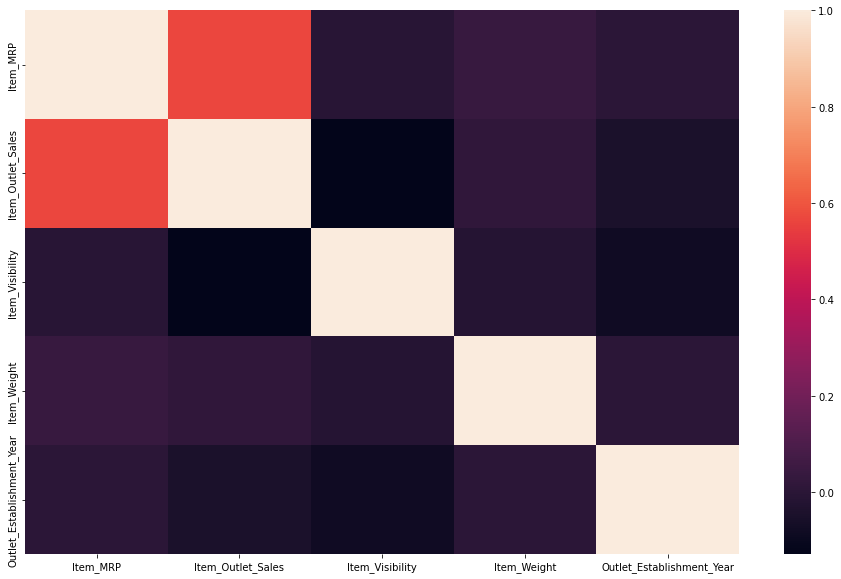

In [105]:
# Plotting correlation between different features

cor = data.corr()
plt.figure(figsize=(16,10))
sns.heatmap(cor)

We can see that there is a good correlation between Item_MRP and Item_Outlet_Sales

# Data Cleaning

In [25]:
# Check missing values:
data.apply(lambda x: sum(x.isnull()))

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
source                          0
dtype: int64

# Filling missing values

In [27]:
data.Item_Outlet_Sales = data.Item_Outlet_Sales.fillna(data.Item_Outlet_Sales.mean())

In [28]:
data.Item_Weight = data.Item_Weight.fillna(data.Item_Weight.mean())

In [29]:
data['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [30]:
data.Outlet_Size = data.Outlet_Size.fillna('Medium')

In [31]:
data.apply(lambda x: sum(x.isnull()))

Item_Fat_Content             0
Item_Identifier              0
Item_MRP                     0
Item_Outlet_Sales            0
Item_Type                    0
Item_Visibility              0
Item_Weight                  0
Outlet_Establishment_Year    0
Outlet_Identifier            0
Outlet_Location_Type         0
Outlet_Size                  0
Outlet_Type                  0
source                       0
dtype: int64

In [32]:
# Item type combine:
data['Item_Identifier'].value_counts()
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

# Feature Engineering

In [33]:
# Fat_Content showing redudancy of differnt types

data.Item_Fat_Content.value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [34]:
# Now replace LF by Low Fat ,low fat by lf,reg by Regular

data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'low fat':'Low Fat','reg':'Regular','LF':'Low Fat'})
data.Item_Fat_Content.value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [36]:
# No of years outlet is working conditon

data['Outlet_Years'] = 2018 - data['Outlet_Establishment_Year']

In [37]:
Mean_Visibility = data['Item_Visibility'].mean()

In [39]:
data['Item_Visibility_MeanRatio'] = data.apply(lambda x:x['Item_Visibility'] / Mean_Visibility,axis=1)

In [40]:
# As Item Id and Outlet Id

# Encoding categorical variables

# Convert categorical into numerical

In [41]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type']
number = LabelEncoder()

In [42]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type']
number = LabelEncoder()

In [43]:
for i in var_mod:
      data[i]=number.fit_transform(data[i])

In [44]:
data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Item_Type_Combined,Outlet_Years,Item_Visibility_MeanRatio
0,0,FDA15,249.8092,3735.1380,4,0.016047,9.30,1999,OUT049,0,1,1,Train,Food,19,0.243315
1,1,DRC01,48.2692,443.4228,14,0.019278,5.92,2009,OUT018,2,1,2,Train,Drinks,9,0.292303
2,0,FDN15,141.6180,2097.2700,10,0.016760,17.50,1999,OUT049,0,1,1,Train,Food,19,0.254122
3,1,FDX07,182.0950,732.3800,6,0.000000,19.20,1998,OUT010,2,1,0,Train,Food,20,0.000000
4,0,NCD19,53.8614,994.7052,9,0.000000,8.93,1987,OUT013,2,0,1,Train,Non-Consumable,31,0.000000


# One-Hot Coding

# Numerical and One-Hot Coding of Categorical variables

In [48]:
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type_Combined'])

In [49]:
data.head()

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,source,Outlet_Years,...,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Item_Type_Combined_Drinks,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable
0,FDA15,249.8092,3735.1380,4,0.016047,9.30,1999,OUT049,Train,19,...,0,1,0,0,1,0,0,0,1,0
1,DRC01,48.2692,443.4228,14,0.019278,5.92,2009,OUT018,Train,9,...,0,1,0,0,0,1,0,1,0,0
2,FDN15,141.6180,2097.2700,10,0.016760,17.50,1999,OUT049,Train,19,...,0,1,0,0,1,0,0,0,1,0
3,FDX07,182.0950,732.3800,6,0.000000,19.20,1998,OUT010,Train,20,...,0,1,0,1,0,0,0,0,1,0
4,NCD19,53.8614,994.7052,9,0.000000,8.93,1987,OUT013,Train,31,...,1,0,0,0,1,0,0,0,0,1


In [50]:
data.dtypes

Item_Identifier                       object
Item_MRP                             float64
Item_Outlet_Sales                    float64
Item_Type                              int32
Item_Visibility                      float64
Item_Weight                          float64
Outlet_Establishment_Year              int64
Outlet_Identifier                     object
source                                object
Outlet_Years                           int64
Item_Visibility_MeanRatio            float64
Item_Fat_Content_0                     uint8
Item_Fat_Content_1                     uint8
Outlet_Location_Type_0                 uint8
Outlet_Location_Type_1                 uint8
Outlet_Location_Type_2                 uint8
Outlet_Size_0                          uint8
Outlet_Size_1                          uint8
Outlet_Size_2                          uint8
Outlet_Type_0                          uint8
Outlet_Type_1                          uint8
Outlet_Type_2                          uint8
Outlet_Typ

In [51]:
# Exporting Data

import warnings
warnings.filterwarnings('ignore')

# Divide into test and train:
train = data.loc[data['source']=="Train"]
test = data.loc[data['source']=="Test"]

# Drop unnecessary columns:
test.drop(['Item_Outlet_Sales','source'], axis = 1, inplace=True)
train.drop(['source'], axis = 1, inplace = True)

# Export files as modified versions
train.to_csv("train_modified.csv", index = False)
test.to_csv("test_modified.csv", index = False)

# Model Building

In [52]:
# Reading modified data 

train2 = pd.read_csv("train_modified.csv")
test2 = pd.read_csv("test_modified.csv")

In [53]:
import statsmodels.api as sm

In [54]:
x = train2[[ 'Item_MRP', 'Item_Fat_Content_0', 'Outlet_Type_0', 'Outlet_Type_1', 'Outlet_Type_2', 'Outlet_Type_3']]
y = train2['Item_Outlet_Sales']

In [55]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Item_MRP            8523 non-null   float64
 1   Item_Fat_Content_0  8523 non-null   int64  
 2   Outlet_Type_0       8523 non-null   int64  
 3   Outlet_Type_1       8523 non-null   int64  
 4   Outlet_Type_2       8523 non-null   int64  
 5   Outlet_Type_3       8523 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 399.6 KB


In [56]:
x.shape, y.shape

((8523, 6), (8523,))

In [57]:
y = np.array(y).reshape(8523,1)

In [58]:
#x = sm.add_constant(x)
lm = sm.OLS(y,x)
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     2188.
Date:                Sat, 08 Apr 2023   Prob (F-statistic):               0.00
Time:                        21:50:12   Log-Likelihood:                -72003.
No. Observations:                8523   AIC:                         1.440e+05
Df Residuals:                    8517   BIC:                         1.441e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Item_MRP              15.5593      0.196     79.196      0.000      15.174      15.944
Item_Fat_Content_0   -50.8447     25.604     -1.986      0.047    -101.035      -0.655
Outlet_Type_0      -1809.9551     47.126    -38.407      0.000   -1902.334   -1717.577
Outlet_Type_1        151.8998     35.756      4.248      0.000      81.809     221.991
Outlet_Type_2       -176.1522     49.265     -3.576      0.000    -272.724     -79.580
Outlet_Type_3       1551.7253     48.975     31.684      0.000    1455.722    1647.729
==============================================================================
Omnibus:                      962.316   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2299.500
Skew:                           0.668   Prob(JB):                         0.00
Kurtosis:                       5.166   Cond. No.                         927.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
import pickle
filename = 'new_model.pkl'
pickle.dump(results, open(filename, 'wb'))

In [60]:
x

,Item_MRP,Item_Fat_Content_0,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
0,249.8092,1,0,1,0,0
1,48.2692,0,0,0,1,0
2,141.6180,1,0,1,0,0
3,182.0950,0,1,0,0,0
4,53.8614,1,0,1,0,0
...,...,...,...,...,...,...
8518,214.5218,1,0,1,0,0
8519,108.1570,0,0,1,0,0
8520,85.1224,1,0,1,0,0
8521,103.1332,0,0,0,1,0


In [61]:
# # X_train = train2.drop(['Item_Outlet_Sales', 'Outlet_Identifier','Item_Identifier'], axis = 1)
y_train = train2.Item_Outlet_Sales

In [62]:
# X_test = test2.drop(['Outlet_Identifier','Item_Identifier'], axis

In [63]:
# X = train2[['Item_MRP','Item_Weight','Identifier']]

In [64]:
x.head()

,Item_MRP,Item_Fat_Content_0,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
0,249.8092,1,0,1,0,0
1,48.2692,0,0,0,1,0
2,141.6180,1,0,1,0,0
3,182.0950,0,1,0,0,0
4,53.8614,1,0,1,0,0


In [65]:
y_train.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

# Linear Regression Model

In [66]:
# Fitting Multiple Linear Regression to the training set

from sklearn.linear_model import  LinearRegression
regressor = LinearRegression()
regressor.fit(x, y_train)

LinearRegression()

In [68]:
import pickle
filename = 'model.pkl'
pickle.dump(regressor, open(filename, 'wb'))

In [69]:
loaded_model = pickle.load(open(filename, 'rb'))

In [70]:
# Predicting the test set results

y_pred = regressor.predict(x)

In [71]:
y_pred

array([3987.90207871,  574.88094743, 2304.52678159, ..., 1425.49690267,
       1428.52433341, 1275.26599809])

In [72]:
# Measuring Accuracy

from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [73]:
lr_accuracy = round(regressor.score(x,y_train) * 100,2)
lr_accuracy

56.22

In [74]:
r2_score(y_train, regressor.predict(x))

0.5622499677586117

In [75]:
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(y_train, regressor.predict(x))))

RMSE : 1129


# Random Forest Model

In [76]:
# Fitting Random Forest Regression to the dataset

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, max_depth=6, min_samples_leaf=50, n_jobs=4)
regressor.fit(x, y_train)

RandomForestRegressor(max_depth=6, min_samples_leaf=50, n_jobs=4)

In [77]:
import joblib 
joblib.dump(regressor, 'filename.pkl')

['filename.pkl']

In [78]:
# Predicting the test set results

y_pred = regressor.predict(x)

In [79]:
y_pred

array([4092.08588975,  744.83249476, 2130.89934229, ..., 1351.60286308,
       1610.50553082, 1179.76292316])

In [80]:
rf_accuracy = round(regressor.score(x,y_train),2)
rf_accuracy

0.61

In [81]:
r2_score(y_train, regressor.predict(x))

0.6109372849789977

In [82]:
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(y_train, regressor.predict(x))))

RMSE : 1064


# Conclusion

During this miniproject, i have developed a predictive model that can help retailers determine the number of sales they are going to make in the future.

By using this model, retailers can plan the number of products that they are going to need. As a consequence, the system will allow them to increase their profits